In [7]:
! pip install pep8
! pip install pymystem3
! pip install nltk

Устанавливаем пакеты.

In [8]:
from pymystem3 import Mystem
from pprint import pprint
from pymorphy2 import MorphAnalyzer
import nltk
from nltk.tokenize import word_tokenize
import collections
import json

Импортируем все, что нам может понадобиться.

## Задание 1 и 2

In [9]:
with open('infinity.txt', encoding='utf-8') as f:
    book = f.read()

Открываем и читаем книгу.

In [10]:
m = Mystem()
%time analise_text = m.analyze(book)

Wall time: 9min 31s


Замеряем время анализа книги.

In [11]:
with open('lemmas.json', 'w', encoding='utf-8') as f:
    json.dump(analise_text, f, ensure_ascii=False)

Создаем новый файл, куда записыываем реузльтаты.

## Задание 3

In [12]:
nltk.download('punkt')
morph = MorphAnalyzer()

[nltk_data] Downloading package punkt to C:\Users\Alexandra
[nltk_data]     Morozova\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Без 'punkt' токенизация отказывается работать, поэтому устанавливаем её

In [102]:
%%time
tokens = word_tokenize(book)
words = [w.lower() for w in tokens if w.isalpha()]
lems = []

for i in words:
    analise = morph.parse(i)
    lems.append(analise)

Wall time: 2.38 s


Токенизируем, удалив пункуацию. Замеряем время токинизации.

In [110]:
list_lem_form = []
for w in lems:
    first = w[0]
    lem_form = (first.word, (first.normal_form, first.tag.POS))
    list_lem_form.append(lem_form)

In [111]:
more_list = [lem_form[1][0] for lem_form in list_lem_form]

Лемма и часть речи "закидывается" в отдельный массив. Без массива отказ записать результаты в файл.

In [112]:
with open('lem_pymorph.json', 'w', encoding='utf-8') as f:
    json.dump(list_lem_form, f, ensure_ascii=False)

Записываем результаты в файл.

## Задание 4

In [16]:
form_count = collections.Counter()
summary = 0
for i  in list_lem_form:
    summary = summary + 1
    form = i[1]
    form_count[form] += 1

for form in form_count:
    print(form, round(form_count[form]/summary, 5))

NOUN 0.24647
VERB 0.17032
None 0.00427
GRND 0.01244
PREP 0.0886
CONJ 0.09324
ADJF 0.08172
NPRO 0.11813
PRCL 0.04996
ADVB 0.06185
PRTF 0.00854
INFN 0.0364
NUMR 0.00186
ADJS 0.01393
PRED 0.00464
COMP 0.00464
INTJ 0.00093
PRTS 0.00204


Сначала считаем количество слов всех частей речи в тексте. Потом считаем и выводим долю каждой части речи относительно всех слов.

### Глаголы

Найдем в книге глаголы. Занесем их в массив. Выведем самые популярные.

In [17]:
verb_count = collections.Counter()
for i in list_lem_form:
    if i[1] == 'VERB':
        verb_count[i[0]] += 1
        
top_verb = verb_count.most_common(20)      
for i in top_verb:
    print(i[0], i[1])

быть 68
мочь 28
сказать 24
стать 18
думать 15
посмотреть 13
хотеть 13
смотреть 11
видеть 11
знать 10
спросить 9
ответить 9
смочь 9
подойти 8
сделать 8
считать 8
начать 6
подняться 6
упасть 6
произойти 6


### Наречия

Найдем в книге наречия. Занесем в массив. Выведем самые популярные.

In [18]:
adv_count = collections.Counter()
for i in list_lem_form:
    if i[1] == 'ADVB':
        adv_count[i[0]] += 1
        
top_adv = adv_count.most_common(20)      
for i in top_adv:
    print(i[0], i[1])

уже 12
сейчас 10
совсем 9
хорошо 9
очень 9
здесь 8
медленно 8
почему 8
несколько 8
потом 7
тогда 6
теперь 6
всего 6
вообще 6
тут 5
спокойно 5
сюда 4
где 4
вдруг 4
быстро 4


## Задание 5

Как хорошо, что мы сделали третье задание. Возьмем же леммы оттуда!

In [19]:
massiv = []
for i in list_lem_form:
    massiv.append(i[0])
bi = nltk.bigrams(massiv)
tri = nltk.trigrams(massiv)

bi_count = collections.Counter(bi).most_common(25)
tri_count = collections.Counter(tri).most_common(25)

Считаем частотность би- и триграмм из задания 3. Выводим ниже.

In [20]:
print('Самые частотные биграмы:')
for i in bi_count:
    print(i[0])

Самые частотные биграмы:
('на', 'земля')
('что', 'мы')
('мы', 'не')
('я', 'не')
('мы', 'быть')
('смотреть', 'на')
('думать', 'что')
('с', 'вы')
('и', 'вы')
('что', 'это')
('мы', 'должный')
('мочь', 'быть')
('посмотреть', 'на')
('в', 'рука')
('вернуться', 'на')
('не', 'знать')
('не', 'хотеть')
('не', 'быть')
('ничто', 'не')
('сказать', 'эллер')
('подойти', 'к')
('что', 'вы')
('не', 'мочь')
('блейк', 'мы')
('что', 'я')


In [21]:
print('Самые частотные триграмы:')
for i in tri_count:
    print(i[0])

Самые частотные триграмы:
('вернуться', 'на', 'земля')
('на', 'земля', 'мы')
('что', 'мы', 'не')
('к', 'пульт', 'управление')
('что', 'с', 'мы')
('я', 'считать', 'что')
('что', 'это', 'значит')
('я', 'думать', 'что')
('мы', 'должный', 'вернуться')
('на', 'земля', 'и')
('возвратиться', 'на', 'земля')
('на', 'миллион', 'год')
('держать', 'в', 'рука')
('для', 'жизнь', 'но')
('вы', 'ведь', 'капитан')
('в', 'глубина', 'космос')
('и', 'мочь', 'быть')
('я', 'в', 'это')
('возвращение', 'на', 'земля')
('появиться', 'лицо', 'сильвий')
('мы', 'выйти', 'на')
('он', 'посмотреть', 'на')
('с', 'мы', 'произойти')
('весь', 'в', 'порядок')
('указать', 'рука', 'на')


Выводятся частотные для русского языка коснтрукции с предлогами, конструкции с именами героев.

### ПРОДОЛЖЕНИЕ

#### Визуализация данных 4-ого задания

In [22]:
import matplotlib.pyplot as plt

Имортируем нужное

Строим графики, таблицы, диаграммы, коммунизм. Наглядно понятно, что мы строим.

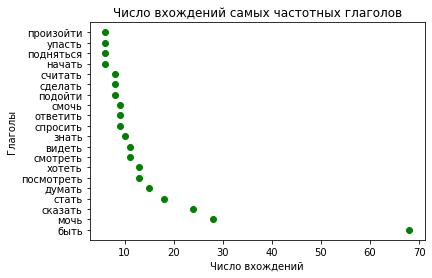

In [123]:
Y = [i[0] for i in top_verb[:20]]
X = [i[1] for i in top_verb[:20]]
plt.scatter(X, Y, color='green', label='verbs')
plt.title('Число вхождений самых частотных глаголов')
plt.ylabel('Глаголы')
plt.xlabel('Число вхождений')
plt.show()

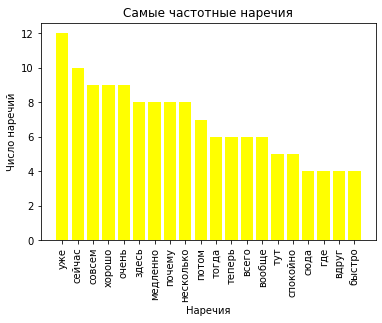

In [25]:
Y = [i[0] for i in top_adv[:20]]
X = [i[1] for i in top_adv[:20]]
plt.bar(Y, X, color='yellow')
plt.xticks(rotation='vertical')
plt.title('Самые частотные наречия')
plt.ylabel('Число наречий')
plt.xlabel('Наречия')
plt.show()

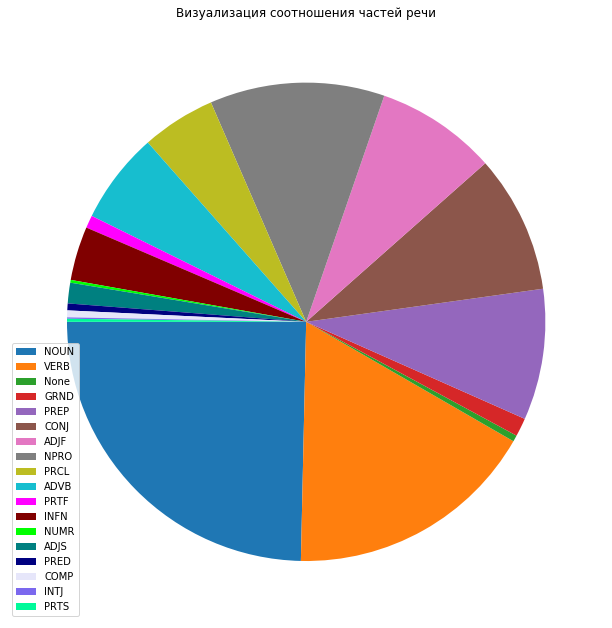

In [48]:
labels = [str(i) for i in form_count]
size = list(form_count.values())
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown',
          'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', '#FF00FF',
          '#800000', '#00FF00', '#008080', '#000080', '#E6E6FA', '#7B68EE', '#00FA9A']
plt.figure(figsize=(11, 11))
plt.title('Визуализация соотношения частей речи')
plt.pie(size, colors=colors, startangle=180)
plt.legend(labels, loc="best")
plt.show()

# Задание с датафреймом смотри в другом файле